# Diffusion Equation / Heat Equation

In [1]:
# Imports
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot, show_anim

## Solution
Our approach will be to first apply the advection numerical algorithm (created in earlier laboratories) and then add the diffusion on top of it.

In [2]:
def F(psi_l, psi_r, C):
    return .5 * (C + abs(C)) * psi_l + \
           .5 * (C - abs(C)) * psi_r

class shift:
    def __init__(self, *, add, sub):
        self.add = add
        self.sub = sub
    def __radd__(self, i): 
        return slice(i.start + self.add, i.stop + self.add)
    def __rsub__(self, i): 
        return slice(i.start - self.sub, i.stop - self.sub)

In [3]:
# class Psi_0:
#     def __init__(self):
#         self.x0 = 5
#         self.a = 1
#         self.sigma = 25
#     def __call__(self, x):
#         return self.a * np.exp(-(x-self.x0)**2 / 2 / self.sigma**2)

# class PsiAnalytic:
#     def __init__(self, *, mu, L):
#         self.mu = mu
#         self.L = L
#     def __call__(self, *, x, t):
#         return np.exp(-self.mu * t * (np.pi / self.L)**2) * np.sin(np.pi * x / self.L)

In [4]:
# psi_analytic = PsiAnalytic(mu=1, L=50)
# psi_0 = Psi_0()
nx = 128
x, dx = np.linspace(0, 50, nx+1, endpoint=True, retstep=True)
u = 3
x = x[:-1] + dx/2
t_max = 20

one = shift(add=1, sub=1)
hlf = shift(add=0, sub=1)

nt = 600
dt = t_max / nt
C_advection = u * dt / dx

i = slice(1, nx-1)
im = slice(1, nx)

In [5]:
## UNUSED FOR NOW

from scipy import constants


# t = np.linspace(1, 100, 100)
M = 1
A = 1



D = .5
# x = np.linspace(1, 100, 100)
# u = .5

def C(x,t):
    ans = np.zeros(len(x))

    ans = (M/A) * (1/(2*np.sqrt(constants.pi * D))) * (x/ t ** (3/2)) * np.exp(-((u*t-x)**2)/(4*D*t))
    ans += 0.01
    return ans

 

In [9]:
# psi = psi_analytic(x=x, t=0)
psi = C(x=x, t=1)
C_diffusion = np.zeros(len(psi) - 1)
output = [psi.copy()]
for _ in range(30,nt):
    # Apply diffusion
    # C_diffusion[im - hlf] = -2 * psi_analytic.mu * dt / dx**2 * (psi[im] - psi[im - one]) / (psi[im - one] + psi[im])
    C_diffusion[im - hlf] = -2 * D * dt / dx**2 * (psi[im] - psi[im - one]) / (psi[im - one] + psi[im])

    assert max(abs(C_diffusion)) <= 1 
    psi[i] = psi[i] - (
        F(psi[i      ], psi[i + one], C_diffusion[i + hlf]) -
        F(psi[i - one], psi[i      ], C_diffusion[i - hlf]) 
    )
    # Apply advection
    psi[i] = psi[i] - (
        F(psi[i    ], psi[i+one], C_advection) -
        F(psi[i-one], psi[i    ], C_advection) 
    )
    output += [psi.copy()]

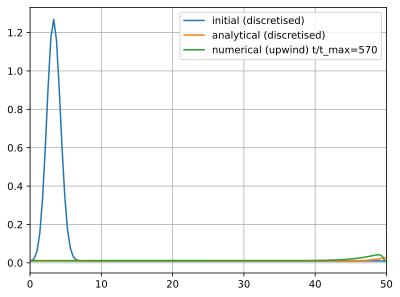

In [10]:
def plot(step):
    fig = pyplot.figure()
    # pyplot.step(x, C(x=x, t=1), label='initial (discretised)', where='mid')
    # pyplot.step(x, psi_analytic(x=x-u*step*dt, t=step*dt), label='analytical (discretised)', where='mid')
    # pyplot.step(x, C(x=x, t=step*dt), label='analytical (discretised)', where='mid')
    # pyplot.step(x, output[step], label=f'numerical (upwind) t/t_max={step}', where='mid')

    pyplot.plot(x, C(x=x, t=1), label='initial (discretised)')
    # pyplot.step(x, psi_analytic(x=x-u*step*dt, t=step*dt), label='analytical (discretised)', where='mid')
    pyplot.plot(x, C(x=x, t=step*dt+1), label='analytical (discretised)')
    pyplot.plot(x, output[step], label=f'numerical (upwind) t/t_max={step}')

    pyplot.legend()
    pyplot.grid()
    pyplot.xlim(0, 50)
    # pyplot.ylim(0, 10)
    return fig 
plot(nt-30)
show_plot('numeric.pdf')


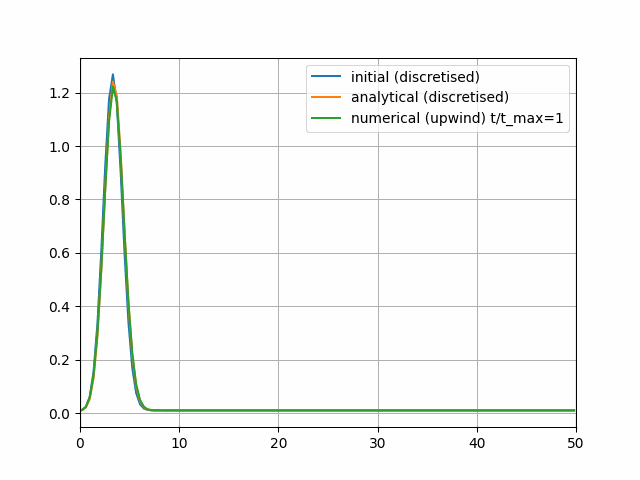

HTML(value="<a href='.\\anim_output.gif' target='_blank'>.\\anim_output.gif</a><br>")

In [11]:
show_anim(plot, range(1, nt-30, 3), gif_file="anim_output.gif")